## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_score,f1_score
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

## Exploratory data analysis

In [2]:
df = pd.read_csv(r'C:\Commback\Learnings\Data Science\Capstone Project - Credit Card Fraud Detection\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print('Dataset Dimension (Rows,Columns) :',df.shape)
df.describe()

Dataset Dimension (Rows,Columns) : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('Number of Non-Fraudulent Records:',classes[0])
print('Number of Fraudulent Records    :',classes[1],'\n')

print('Non-Fraudulent Class % :',normal_share)
print('Fraudulent Class %     :',fraud_share)

Number of Non-Fraudulent Records: 284315
Number of Fraudulent Records    : 492 

Non-Fraudulent Class % : 99.82725143693798
Fraudulent Class %     : 0.1727485630620034


In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df1=pd.DataFrame({'Class':classes.index,'Number':classes.values,'Percentage':[normal_share,fraud_share]})
df1.head()

,Class,Number,Percentage
0,0,284315,99.827251
1,1,492,0.172749


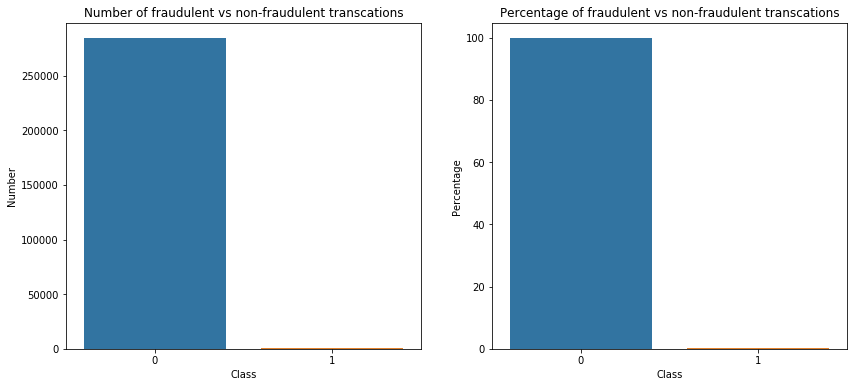

In [6]:
plt.figure(figsize=(14,6))

# Number of fraudulent vs non-fraudulent transcations
plt.subplot(1,2,1)
sns.barplot(x='Class',y='Number',data=df1)
plt.title('Number of fraudulent vs non-fraudulent transcations')

# Percentage of fraudulent vs non-fraudulent transcations
plt.subplot(1,2,2)
sns.barplot(x='Class',y='Percentage',data=df1)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

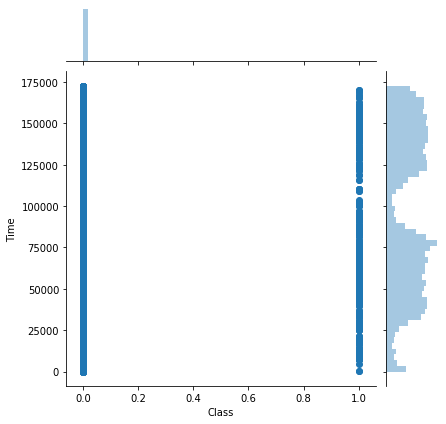

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.jointplot(x='Class',y='Time',data=df)
plt.show()

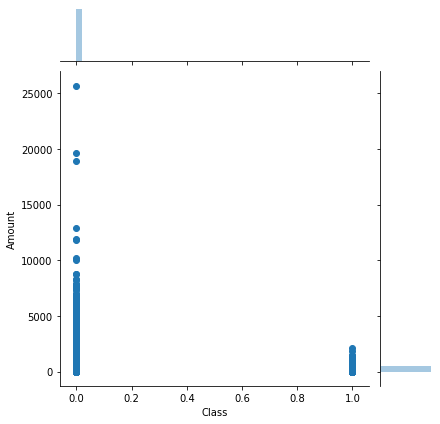

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.jointplot(x='Class',y='Amount',data=df)
plt.show()

In [9]:
# Creating 2 dataframes for Non-Fraud and Fraud Classes
Normal_df=df[df['Class']==0]
Fraud_df=df[df['Class']==1]

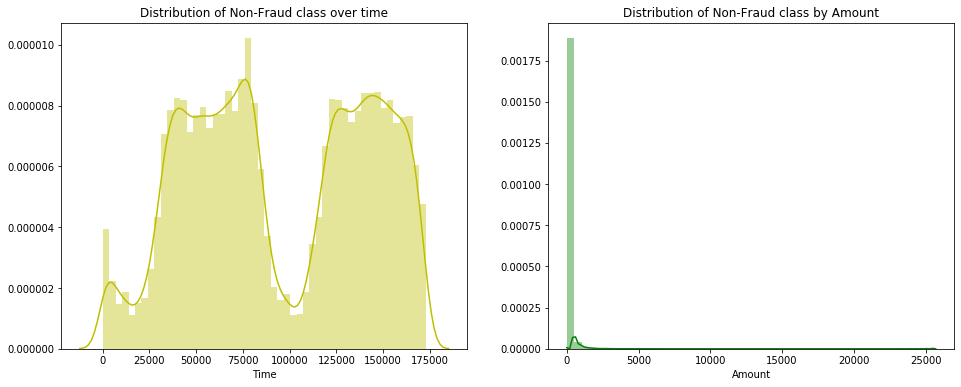

In [10]:
# Non-Fraudulent Class
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(Normal_df['Time'],color='y')
plt.title('Distribution of Non-Fraud class over time')

plt.subplot(1,2,2)
sns.distplot(Normal_df['Amount'],color='g')
plt.title('Distribution of Non-Fraud class by Amount')
plt.show()

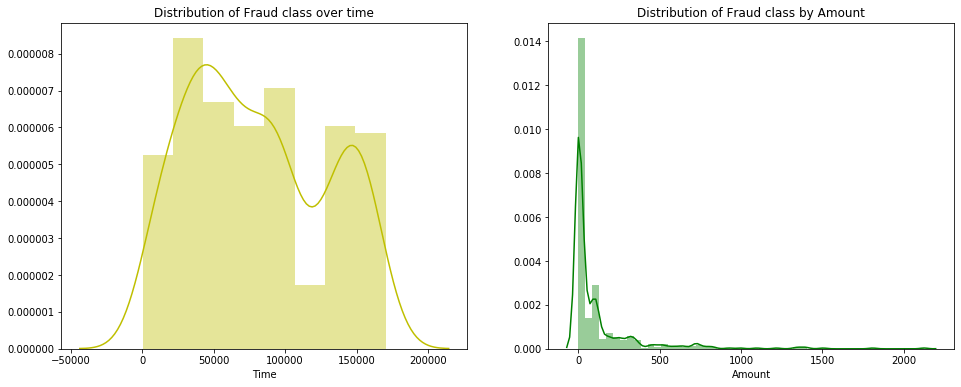

In [11]:
# Fraudulent Class
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(Fraud_df['Time'],color='y')
plt.title('Distribution of Fraud class over time')

plt.subplot(1,2,2)
sns.distplot(Fraud_df['Amount'],color='g')
plt.title('Distribution of Fraud class by Amount')
plt.show()

In [12]:
# Drop unnecessary columns
# Checking for nullable columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Splitting the data into train & test data

In [13]:
y= df['Class']#class variable
X= df.drop('Class',axis=1)

In [14]:
#from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=70)

In [15]:
print(X_train.shape)
print(X_test.shape)

(199364, 30)
(85443, 30)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

In [17]:
# Get all the numeric data dtypes
numeric_cols=X.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

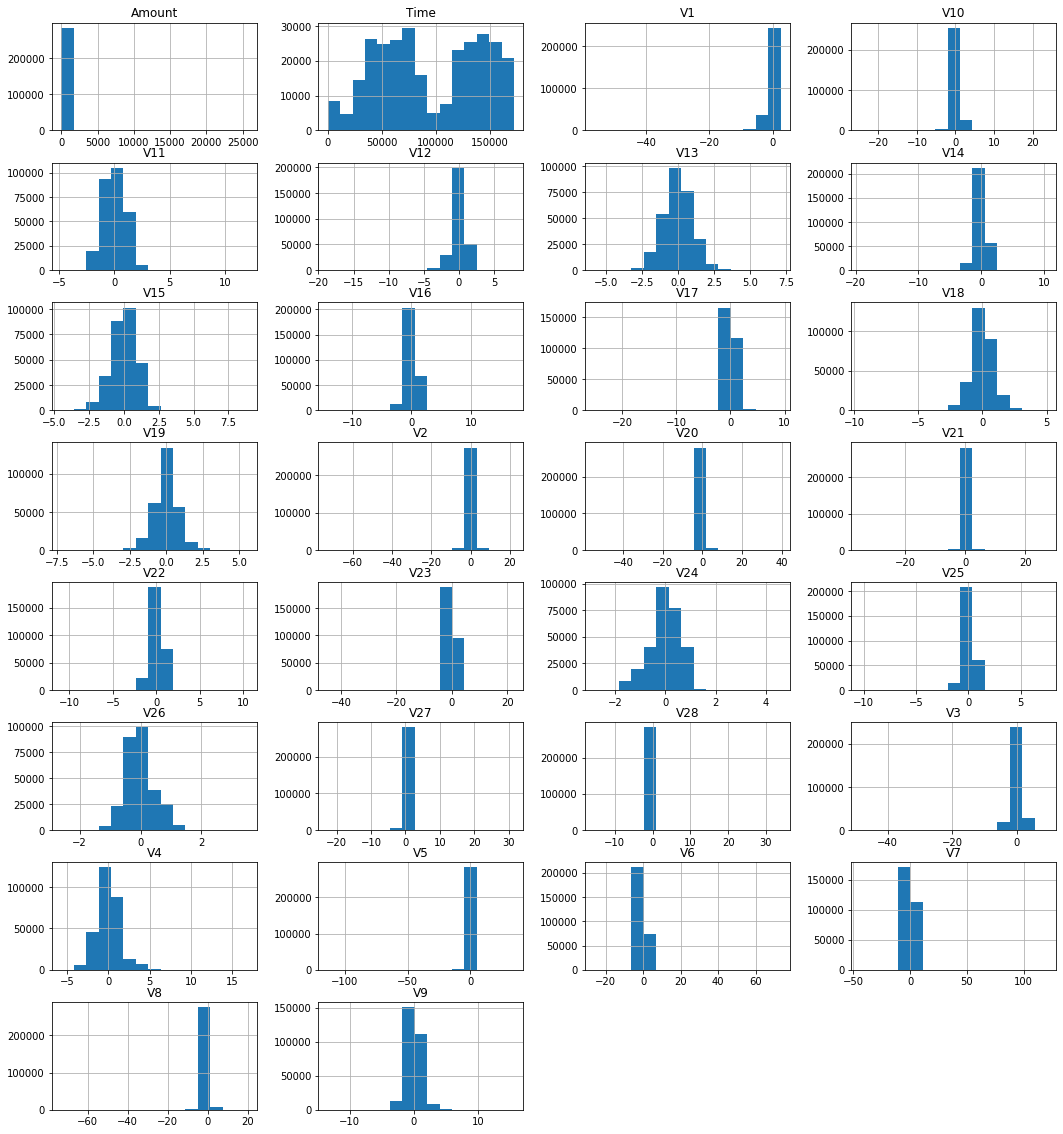

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
X[numeric_cols].hist(bins=15, figsize=(18, 20), layout=(8,4));

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

X_train_trans=pt.fit_transform(X_train)
X_test_trans=pt.fit_transform(X_test)


In [20]:
print(X_train_trans.shape)
print(X_test_trans.shape)

(199364, 30)
(85443, 30)


In [21]:
print(type(X_train_trans))
print(type(X_test_trans))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [23]:
# Convert the numpy array to pandas dataframe
X_train_trans_new=pd.DataFrame(X_train_trans,columns=X.columns)
X_test_trans_new=pd.DataFrame(X_test_trans,columns=X.columns)

In [24]:
# Merging the Train and Test dataset into single dataframe for plotting the graph
X_trans=pd.concat([X_train_trans_new,X_test_trans_new],axis=0,ignore_index=True)

In [25]:
X_trans.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.116748,-1.736898,2.022974,-0.456223,-0.038808,2.615677,-1.586271,4.685832,-4.660654,6.632771,...,5.640175,-2.781998,-0.318671,-1.001189,0.789688,0.389053,-2.688214,-4.689654,-8.724699,-1.537677
1,-0.396747,0.795414,-0.558127,0.483831,-0.446704,-1.041351,-0.355894,-0.883057,-0.051885,-0.124208,...,0.045443,0.494560,1.232211,-0.232272,-0.014323,0.822738,0.041463,0.056441,0.076917,-0.028999
2,-0.985514,-1.230743,1.314530,-0.004870,0.280261,1.163394,3.377010,-1.957467,-3.124945,0.890314,...,-1.161277,6.126089,-3.590857,1.006500,1.672088,0.571228,-0.679899,1.748409,0.712392,-0.707583
3,0.833020,-0.984933,-0.293423,0.904454,-0.388454,1.485839,-1.001194,0.208964,-0.044406,-0.753002,...,0.420143,-0.182706,-1.105491,-0.216132,-0.602818,1.158763,0.721751,-0.240516,0.181403,-1.270427
4,-0.573307,-0.310941,0.665728,0.045769,1.802651,0.861659,-0.213270,0.529440,-0.180653,-1.325952,...,0.389199,0.176008,0.557228,0.032191,-0.795752,-1.649915,0.400541,1.191071,0.948362,-0.709393


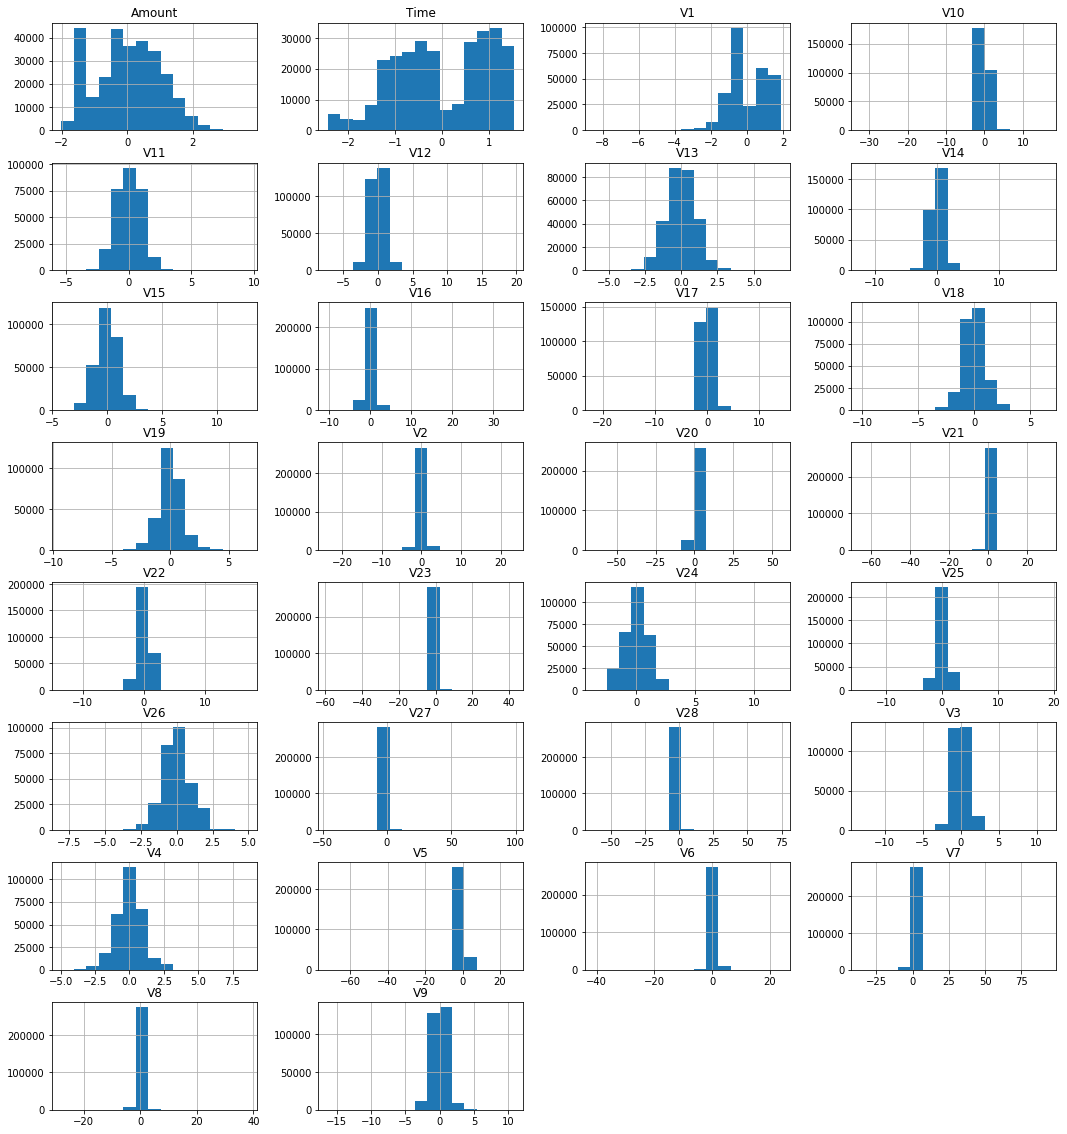

In [26]:
# plot the histogram of a variable from the dataset again to see the result 
X_trans[numeric_cols].hist(bins=15, figsize=(18, 20), layout=(8,4));

## Model Building
- Build different models on the imbalanced dataset and see the result

In [27]:
# Logistic Regression
from sklearn import linear_model #import the package

# Replacing the original datasets with the transformed ones
X_train=X_train_trans_new
X_test=X_test_trans_new

# instantiate the model
logreg = LogisticRegression()

#fit the model on the training data
lrm = logreg.fit(X_train,y_train)


# Predict using model
y_pred_prob = lrm.predict_proba(X_test)


# Check the ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))


#num_C = ______  #--> list of values
#cv_num =   #--> list of values

'Value of ROC :0.97'

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Logistic Regression with hyperparameter  tuning

In [28]:
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2)
grid_log_reg.fit(X_train, y_train)


# LogisticRegression with  best hype-parameter
log_reg = grid_log_reg.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.001, penalty=l2, total=   0.8s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.001, penalty=l2, total=   0.8s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.7s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.7s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.8s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.4s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.5s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   1.5s
[CV] C=0.1, penalty=l2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.3s finished


In [29]:
print("Best Parameters: ",grid_log_reg.best_params_)
print("Best Score     : ",grid_log_reg.best_score_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Best Score     :  0.9811627529026928


### Decision Tree with hyperparameter tuning

In [30]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [10, 30, 60],
    'min_samples_split' : [10, 30, 60]
}


# Instantiate the grid search model
dt = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
dec_tree = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           verbose=2, 
                           scoring = "roc_auc")


# Fit the grid search to the data
dec_tree.fit(X_train, y_train)


# Decision Tree with  best hype-parameter
dc_reg = dec_tree.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.4s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   2.9s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.6s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.5s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   3.3s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   3.4s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   3.1s
[CV] max_depth=2, min_samples_leaf=10, min

[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=60, total=   4.9s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=60, total=   5.4s
[CV] max_depth=3, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=3, min_samples_leaf=10, min_samples_split=60, total=   5.3s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=10, total=   5.0s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=10, total=   4.9s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=10, total=   5.2s
[CV] max_depth=3, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=3, min_samples_leaf=30, min_samples_split=10, total=   4.9s
[CV] max_depth=3, min_samples_leaf=30, min

[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=30, total=   8.8s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=30 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=30, total=   8.2s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=60, total=   8.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=60, total=   8.3s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=60, total=   8.7s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=60, total=   8.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=60, total=   8.1s
[CV] max_depth=5, min_samples_leaf=60, min

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 12.7min finished


In [31]:
print("Best Parameters: ",dec_tree.best_params_)
print("Best Score     : ",dec_tree.best_score_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 10}
Best Score     :  0.9244704957959817


### XGBoost with hyperparameter training

In [32]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        verbose = 2,
                        scoring= 'roc_auc')    

# fit the model
xgb.fit(X_train, y_train)  

# XGB with  best hype-parameter
xgb_reg = xgb.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.2, subsample=0.3 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total=  46.9s
[CV] learning_rate=0.2, subsample=0.3 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.8s remaining:    0.0s
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total=  47.0s
[CV] learning_rate=0.2, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total=  47.8s
[CV] learning_rate=0.2, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total=  47.2s
[CV] learning_rate=0.2, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total=  49.0s
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.2min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.3min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.3min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.3min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.3min
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total= 1.5min
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total= 1.5min
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total= 1.5min
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total= 1.6min
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total= 2.0min
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  47.0s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  47.6s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  48.3s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  47.9s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  52.0s
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.2min
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.2min
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.2min
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.2min
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.2min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.5min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.5min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.5min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.5min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.4min


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 35.8min finished
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
print("Best Parameters: ",xgb.best_params_)
print("Best Score     : ",xgb.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'subsample': 0.9}
Best Score     :  0.9833520257359956


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Unbalanced Data :Building the models with  optimum hyperparameters
- Logistic Regression

In [34]:
clf = LogisticRegression(C= 0.1, penalty='l2')  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric


y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.97'

In [35]:
# Function for Confusion Matrix
def calscore(predict,y_test):
    lr_predict=predict
    cm = confusion_matrix(y_test, lr_predict)
    accuracy = accuracy_score(y_test, lr_predict)
    recall = recall_score(y_test, lr_predict)
    precision = precision_score(y_test, lr_predict)
    
    auc = roc_auc_score(y_test, lr_predict)
    score=f1_score(y_test, lr_predict)

    print("Accuracy  : {:.2%}".format(accuracy))
    print("Recall    : {:.2%}".format(recall))
    print("Precision : {:.2%}".format(precision))
    print("ROC AUC   : {:.2%}".format(auc))
    print("F1 score  : {:.2%}".format(score))

    plt.figure(figsize = (6,6))
    sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
    
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    plt.xlim(-0.001, len(np.unique(y))-0.001)
    plt.ylim(len(np.unique(y))-0.001, -0.01)
    plt.show()


In [36]:
# Function for plotting  roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=2)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='lower right')
    plt.title('Receiver operating characteristic (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Logistic Regression : Evaluation Parameters
Accuracy  : 99.93%
Recall    : 67.57%
Precision : 88.50%
ROC AUC   : 83.78%
F1 score  : 76.63%


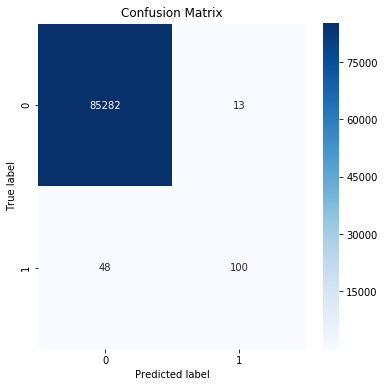

In [37]:
print('Logistic Regression : Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

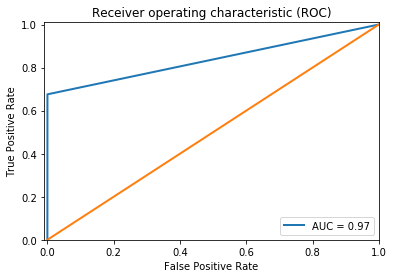

In [38]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- Decision Tree

In [39]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 60, min_samples_split= 10)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.96'

Decision Tree: Evaluation Parameters
Accuracy  : 99.94%
Recall    : 78.38%
Precision : 85.93%
ROC AUC   : 89.18%
F1 score  : 81.98%


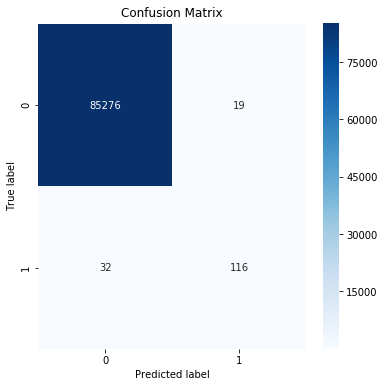

In [40]:
print('Decision Tree: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

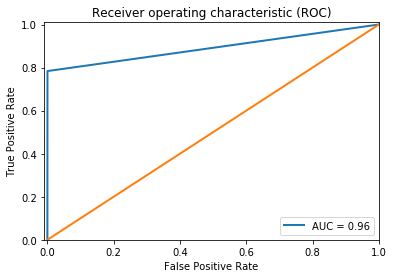

In [41]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- XG Boost

In [42]:
clf = XGBClassifier(learning_rate=0.2, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


'Value of ROC :0.98'

XG Boost : Evaluation Parameters
Accuracy  : 99.96%
Recall    : 80.41%
Precision : 97.54%
ROC AUC   : 90.20%
F1 score  : 88.15%


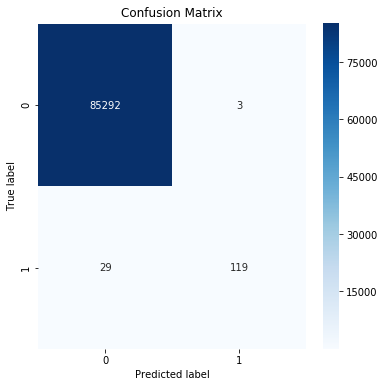

In [43]:
print('XG Boost : Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

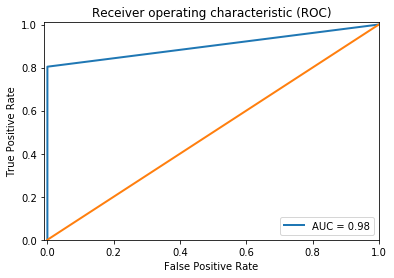

In [44]:
# Plot the roc curve 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


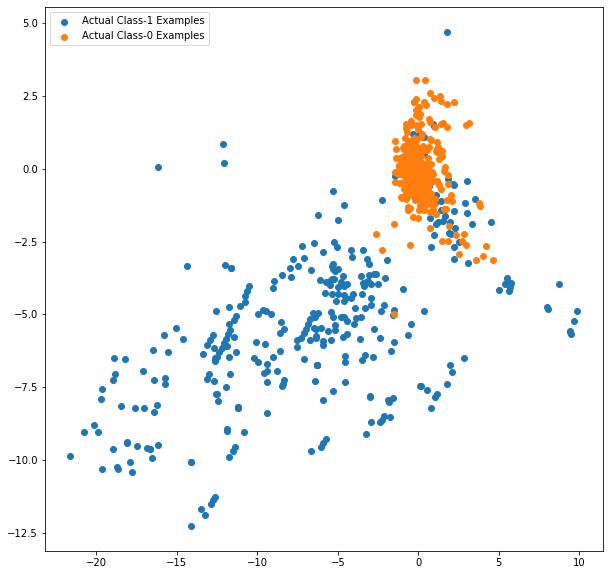

In [45]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [46]:
from imblearn import over_sampling #- import the packages

random = RandomOverSampler(random_state=40)
X_oversample, y_oversample = random.fit_sample(X_train,y_train)

In [47]:
# There are now equal sample for Fraudent and Non-Fraudulent records in the dataset
y_oversample.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

### Logistic Regression with Hyperparameter Training

In [48]:
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2,cv=folds)
grid_log_reg.fit(X_oversample, y_oversample)


# LogisticRegression with  best hype-parameter
log_reg = grid_log_reg.best_estimator_

C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   2.3s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .............................. C=0.001, penalty=l2, total=   2.5s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   2.5s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.7s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.6s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.4s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   3.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   2.9s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   41.1s finished


In [49]:
print("Best Parameters: ",grid_log_reg.best_params_)
print("Best Score     : ",grid_log_reg.best_score_)

Best Parameters:  {'C': 100, 'penalty': 'l2'}
Best Score     :  0.9905694044168855


### Decision Tree with hyperparameter Training

In [50]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [10, 30, 60],
    'min_samples_split' : [10, 30, 60]
}

# Stratified k-fold cross-validation
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)

# Instantiate the grid search model
dt = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
dec_tree = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           verbose=2, 
                           scoring = "roc_auc",
                           cv=folds)


# Fit the grid search to the data
dec_tree.fit(X_oversample, y_oversample)


# Decision Tree with  best hype-parameter
dc_reg = dec_tree.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.7s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   3.9s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   4.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   3.7s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   4.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   3.6s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=60, total=   4.1s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=60, total=   3.7s
[CV] max_depth=2, min_samples_leaf=10, min

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=   8.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=   8.9s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=   8.6s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=   9.5s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=   9.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=   9.0s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=10, total=   8.8s
[CV] max_depth=5, min_samples_leaf=30, min

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  8.2min finished


In [51]:
print("Best Parameters: ",dec_tree.best_params_)
print("Best Score     : ",dec_tree.best_score_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Score     :  0.9871283740509383


### XGBoost with hyperparameter Training

In [52]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# Stratified k-fold cross-validation
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        verbose = 2,
                        scoring= 'roc_auc',
                        cv=folds)    

# fit the model
xgb.fit(X_oversample, y_oversample)  

# XGB with  best hype-parameter
xgb_reg = xgb.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] learning_rate=0.2, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.2min
[CV] learning_rate=0.2, subsample=0.3 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.2min
[CV] learning_rate=0.2, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.2min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total= 1.4min
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total=  47.0s
[CV] learning_rate=0.2, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.6, total=  46.6s
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total=  55.3s
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total=  47.5s
[CV] learning_rate=0.2, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.9, total=  46.8s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:13:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  31.6s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  32.8s
[CV] learning_rate=0.6, subsample=0.3 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.3, total=  32.5s
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total=  41.6s
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total=  41.6s
[CV] learning_rate=0.6, subsample=0.6 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.6, total= 1.1min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.7min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.7min
[CV] learning_rate=0.6, subsample=0.9 ................................


C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.6, subsample=0.9, total= 1.8min


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 18.4min finished
C:\Users\lantao\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
print("Best Parameters: ",xgb.best_params_)
print("Best Score     : ",xgb.best_score_)

Best Parameters:  {'learning_rate': 0.6, 'subsample': 0.9}
Best Score     :  0.999986347028689


### Random OverSampling :Building the models with  optimum hyperparameters
- Logistic Regression

In [92]:
clf = LogisticRegression(C= 100, penalty='l2')  #initialise the model with optimum hyperparameters
clf.fit(X_oversample, y_oversample)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric


y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.97'

Logistic Regression : Evaluation Parameters
Accuracy  : 97.06%
Recall    : 93.24%
Precision : 5.22%
ROC AUC   : 95.15%
F1 score  : 9.89%


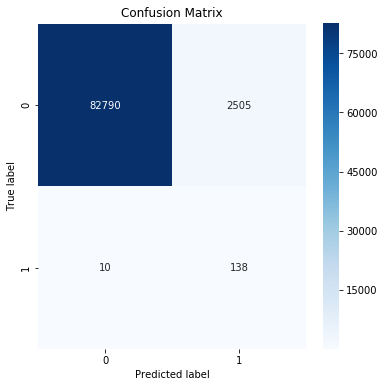

In [93]:
print('Logistic Regression : Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

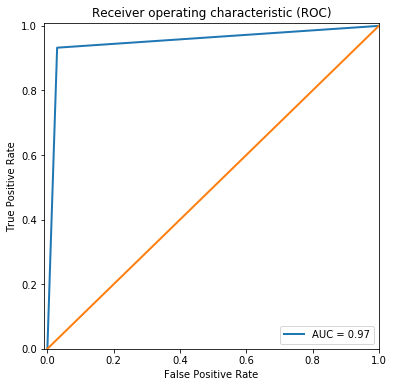

In [99]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- Decision Tree

In [100]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 10, min_samples_split= 10)  #initialise the model with optimum hyperparameters
clf.fit(X_oversample, y_oversample)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

    
# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.88'

Decision Tree: Evaluation Parameters
Accuracy  : 97.37%
Recall    : 83.78%
Precision : 5.29%
ROC AUC   : 90.59%
F1 score  : 9.95%


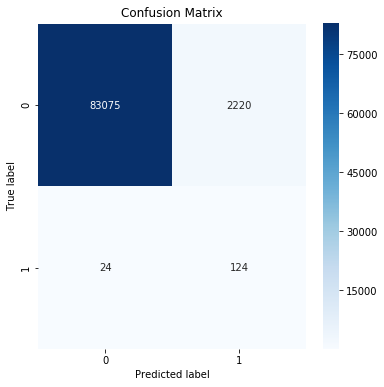

In [101]:
print('Decision Tree: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

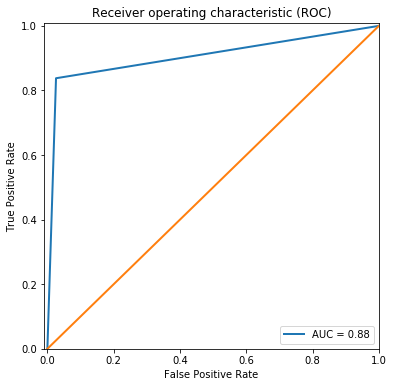

In [102]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- XG Boost

In [103]:
clf = XGBClassifier(learning_rate=0.6, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_oversample, y_oversample)

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)
    
# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

[16:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


'Value of ROC :0.97'

XG Boost: Evaluation Parameters
Accuracy  : 99.95%
Recall    : 85.14%
Precision : 85.14%
ROC AUC   : 92.55%
F1 score  : 85.14%


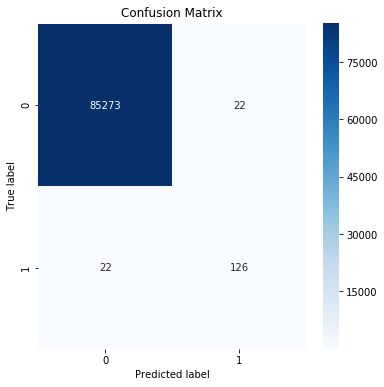

In [104]:
print('XG Boost: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

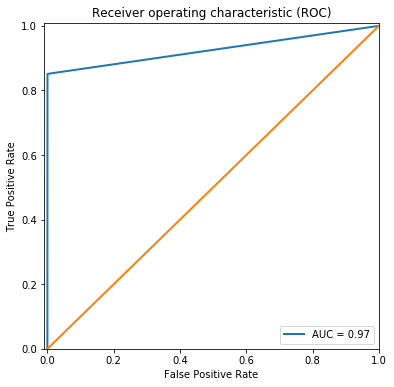

In [105]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Print the class distribution after applying SMOTE 

In [106]:
smote = SMOTE(random_state=40)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

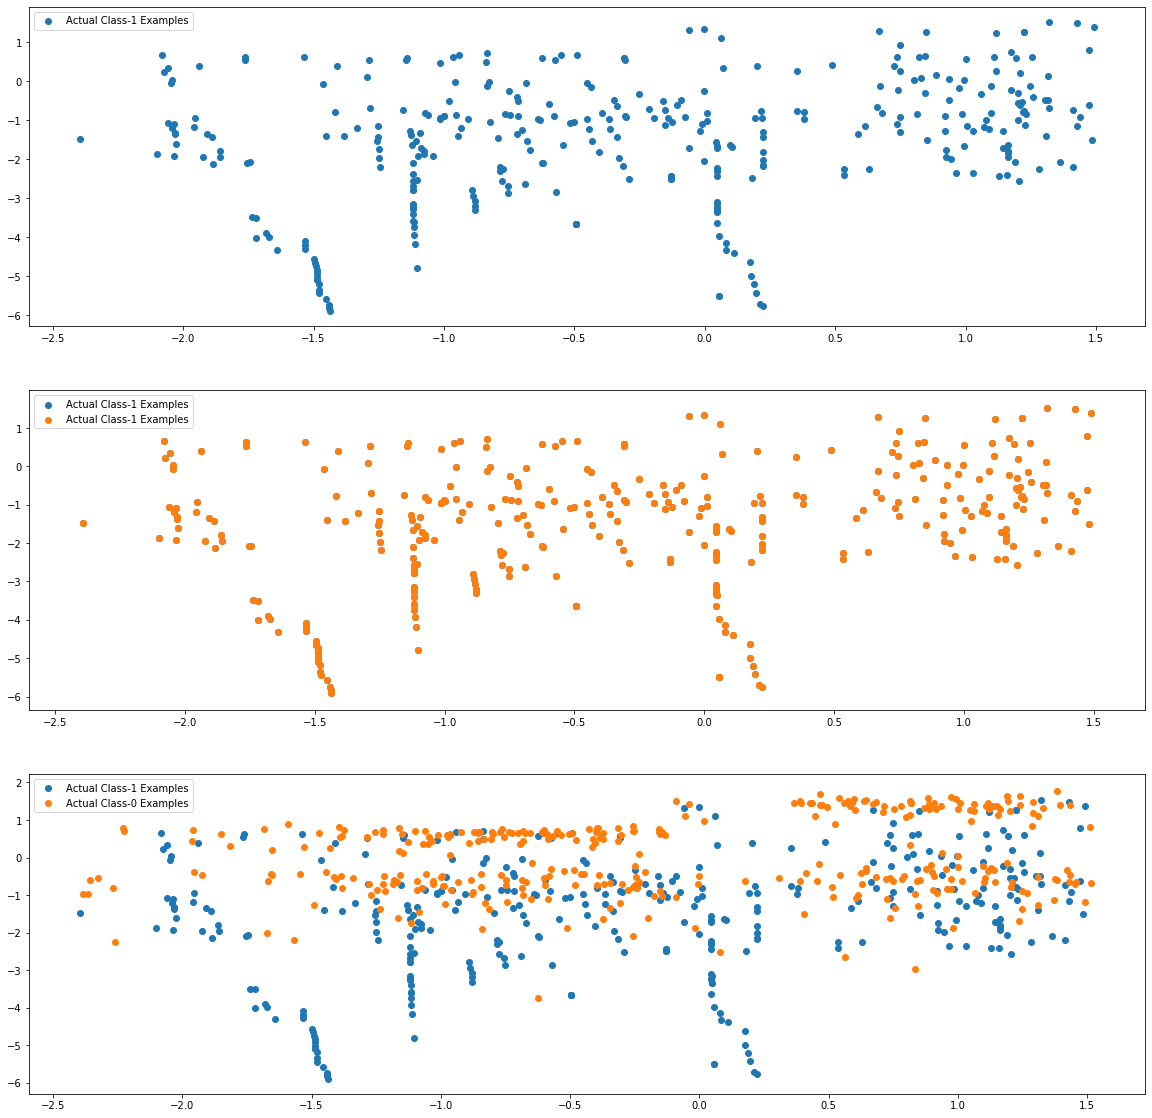

In [107]:
import warnings
warnings.filterwarnings("ignore")


#sm = over_sampling.SMOTE(random_state=0)
#X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20,20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            #label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
           # label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


### Logistic Regression with Hyperparameter Training

In [65]:
# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.1, 1, 10, 100]}
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,scoring='roc_auc',verbose=2,cv=folds)
grid_log_reg.fit(X_train_smote, y_train_smote)


# LogisticRegression with  best hype-parameter
log_reg = grid_log_reg.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.001, penalty=l2, total=   2.5s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .............................. C=0.001, penalty=l2, total=   2.2s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   2.1s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.4s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.8s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   2.8s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   2.6s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   2.6s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   38.8s finished


In [66]:
print("Best Parameters: ",grid_log_reg.best_params_)
print("Best Score     : ",grid_log_reg.best_score_)

Best Parameters:  {'C': 100, 'penalty': 'l2'}
Best Score     :  0.9923204811505227


### Decision Tree with Hyperparameter Training

In [67]:
# Create the parameter grid 
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [10, 30, 60],
    'min_samples_split' : [10, 30, 60]
}

# Stratified k-fold cross-validation
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)

# Instantiate the grid search model
dt = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model
dec_tree = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           verbose=2, 
                           scoring = "roc_auc",
                           cv=folds)


# Fit the grid search to the data
dec_tree.fit(X_train_smote, y_train_smote)


# Decision Tree with  best hype-parameter
dc_reg = dec_tree.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   6.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   5.6s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=10, total=   6.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   5.8s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   6.4s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=30, total=   6.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=60, total=   5.9s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=60, total=   6.0s
[CV] max_depth=2, min_samples_leaf=10, min

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=  14.6s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=  13.8s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=30 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=30, total=  14.4s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=  14.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=  14.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=60 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=60, total=  13.4s
[CV] max_depth=5, min_samples_leaf=30, min_samples_split=10 ..........
[CV]  max_depth=5, min_samples_leaf=30, min_samples_split=10, total=  13.9s
[CV] max_depth=5, min_samples_leaf=30, min

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 13.0min finished


In [68]:
print("Best Parameters: ",dec_tree.best_params_)
print("Best Score     : ",dec_tree.best_score_)

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Score     :  0.9896577077165601


### XG Boost with Hyperparameter Training

In [69]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# Stratified k-fold cross-validation
folds = StratifiedKFold(n_splits=3, random_state=70, shuffle=False)

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        verbose = 2,
                        scoring= 'roc_auc',
                        cv=folds)    

# fit the model
xgb.fit(X_train_smote, y_train_smote)  

# XGB with  best hype-parameter
xgb_reg = xgb.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] learning_rate=0.2, subsample=0.3 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.5min
[CV] learning_rate=0.2, subsample=0.3 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[14:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.5min
[CV] learning_rate=0.2, subsample=0.3 ................................
[14:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................. learning_rate=0.2, subsample=0.3, total= 1.5min
[CV] learning_rate=0.2, subsample=0.6 ................................
[14:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 30.7min finished


[15:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print("Best Parameters: ",xgb.best_params_)
print("Best Score     : ",xgb.best_score_)

Best Parameters:  {'learning_rate': 0.6, 'subsample': 0.9}
Best Score     :  0.9999517467517274


### SMOTE :Building the models with  optimum hyperparameters
- Logistic Regression

In [108]:
clf = LogisticRegression(C= 100, penalty='l2')  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote)

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.97'

Logistic Regression : Evaluation Parameters
Accuracy  : 96.98%
Recall    : 92.57%
Precision : 5.07%
ROC AUC   : 94.78%
F1 score  : 9.61%


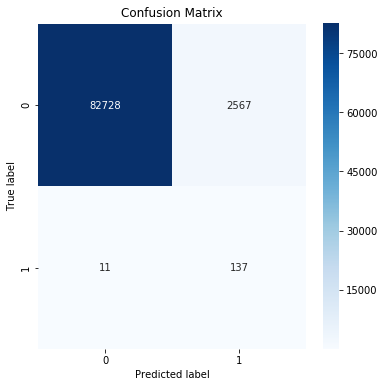

In [109]:
print('Logistic Regression : Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

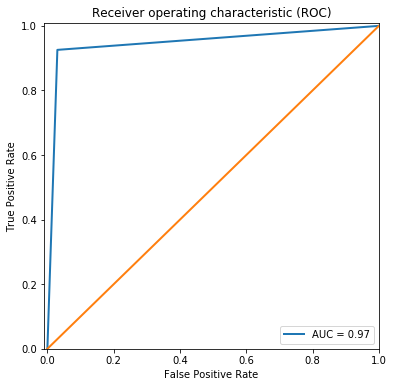

In [110]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- Decisoin Tree

In [111]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 10, min_samples_split= 10)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.92'

Decision Tree: Evaluation Parameters
Accuracy  : 96.05%
Recall    : 87.16%
Precision : 3.70%
ROC AUC   : 91.61%
F1 score  : 7.10%


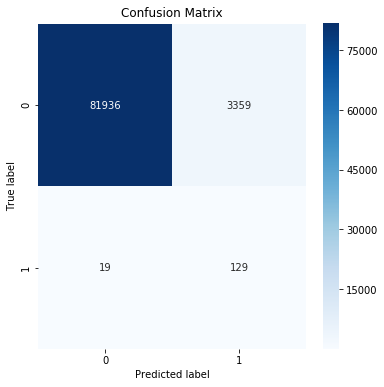

In [112]:
print('Decision Tree: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

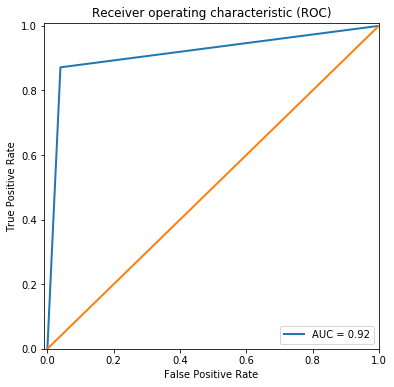

In [115]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- XG Boost

In [116]:
clf = XGBClassifier(learning_rate=0.6, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote)

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)
    
# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

[16:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


'Value of ROC :0.97'

XG Boost: Evaluation Parameters
Accuracy  : 99.61%
Recall    : 87.84%
Precision : 29.48%
ROC AUC   : 93.74%
F1 score  : 44.14%


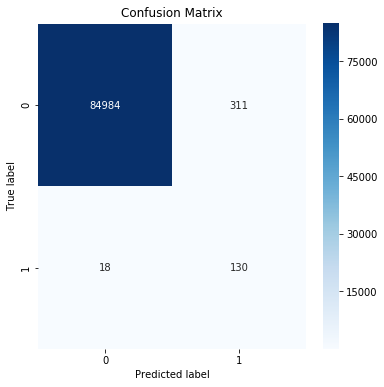

In [117]:
print('XG Boost: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

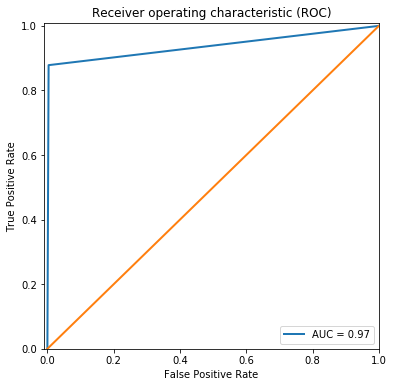

In [118]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

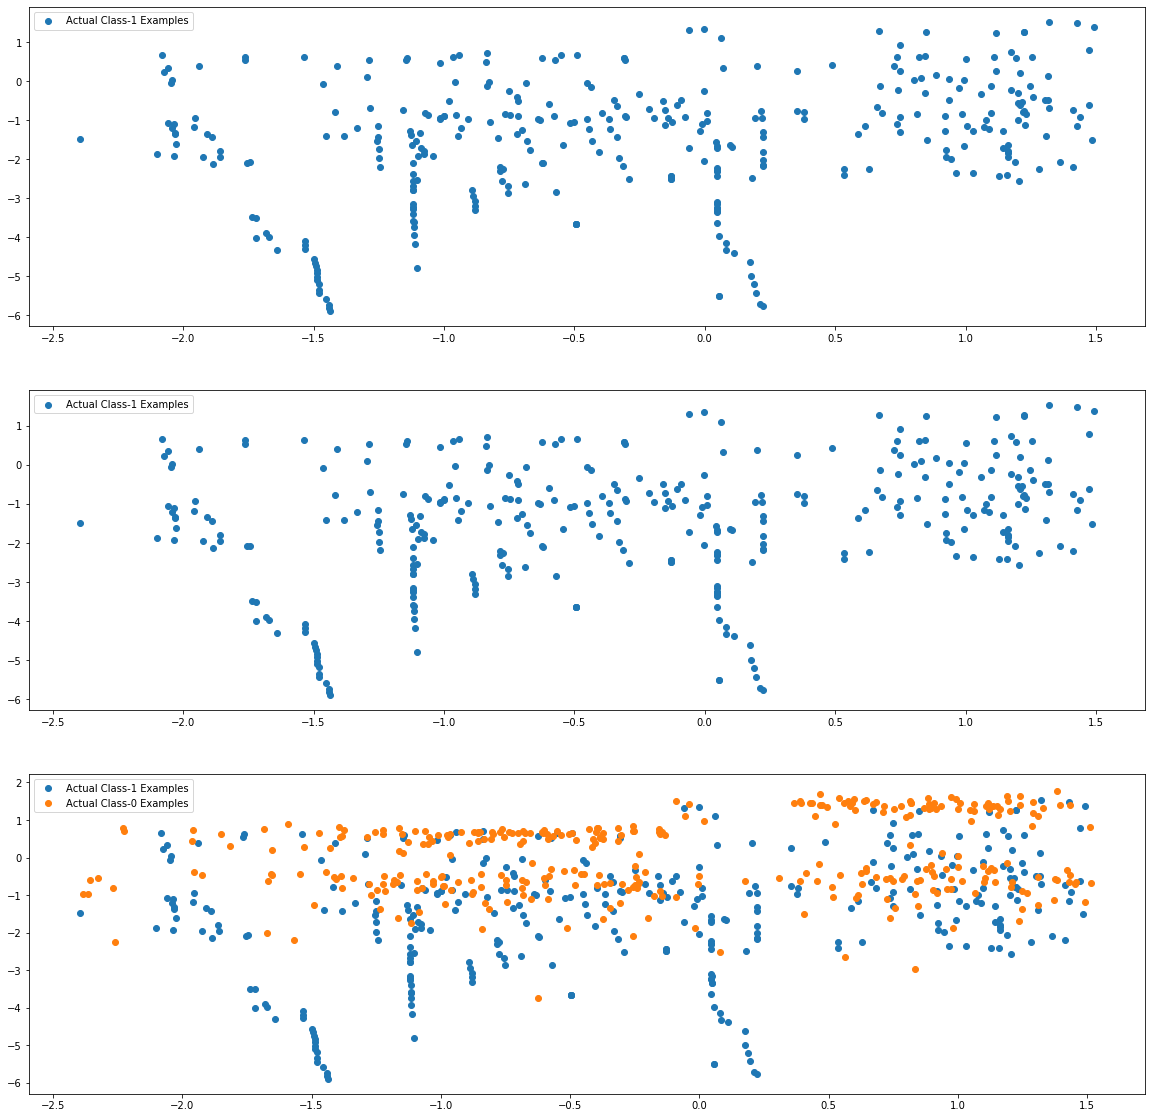

In [119]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            #label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### ADASYN :Building the models with  optimum hyperparameters
- Logistic Regression

In [120]:
clf = LogisticRegression(C= 100, penalty='l2')  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.97'

Logistic Regression : Evaluation Parameters
Accuracy  : 92.40%
Recall    : 92.57%
Precision : 2.07%
ROC AUC   : 92.49%
F1 score  : 4.05%


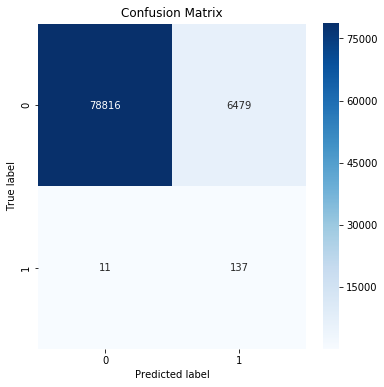

In [121]:
print('Logistic Regression : Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

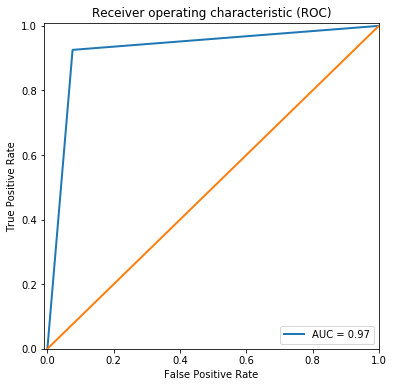

In [122]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- Decision Tree

In [123]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 10, min_samples_split= 10)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)

# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

'Value of ROC :0.96'

Decision Tree: Evaluation Parameters
Accuracy  : 91.12%
Recall    : 93.24%
Precision : 1.79%
ROC AUC   : 92.18%
F1 score  : 3.51%


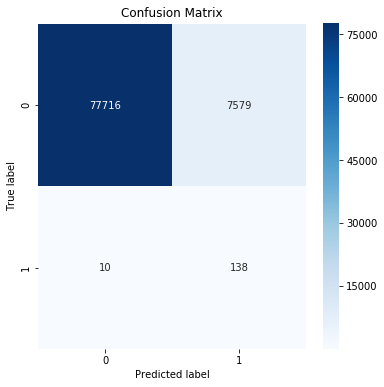

In [124]:
print('Decision Tree: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

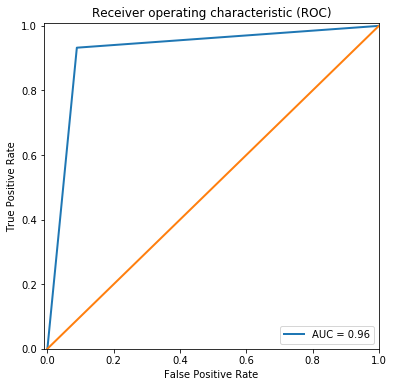

In [125]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

- XG Boost

In [126]:
clf = XGBClassifier(learning_rate=0.6, subsample=0.9, max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)

y_pred_prob = clf.predict_proba(X_test)
lr_predict = clf.predict(X_test)
    
# Check ROC score
"Value of ROC :{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

[16:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


'Value of ROC :0.98'

XG Boost: Evaluation Parameters
Accuracy  : 99.46%
Recall    : 87.84%
Precision : 22.65%
ROC AUC   : 93.66%
F1 score  : 36.01%


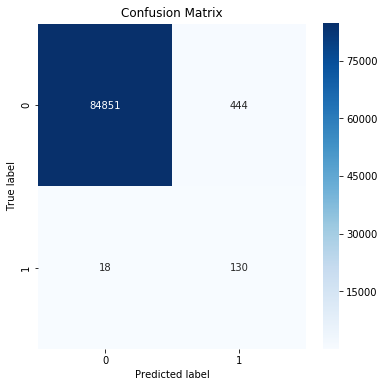

In [127]:
print('XG Boost: Evaluation Parameters')
model_score = calscore(lr_predict,y_test)

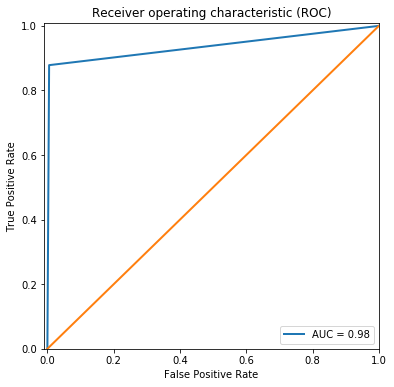

In [128]:
# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Print the important features of the best model to understand the dataset

Top var = 5
2nd Top var = 15
3rd Top var = 9


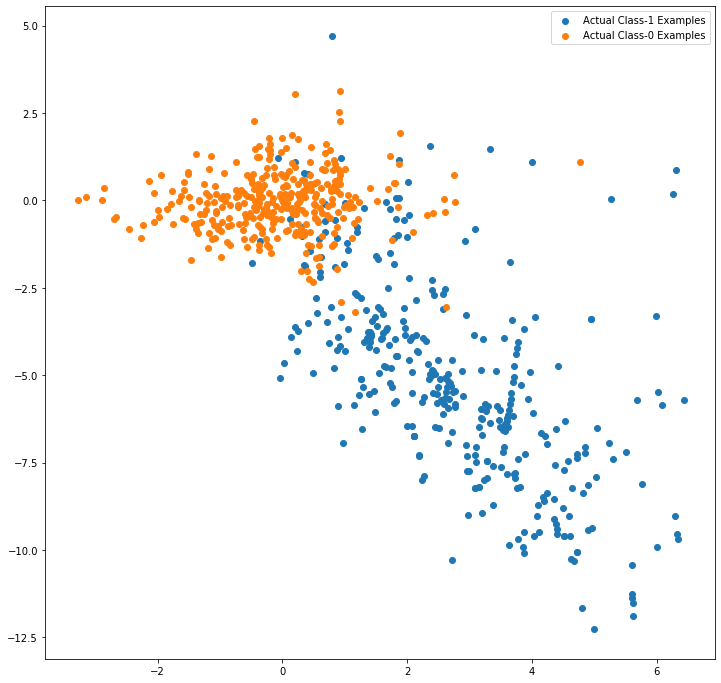

In [131]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,12]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Train auc = 0.9365864574933103
1


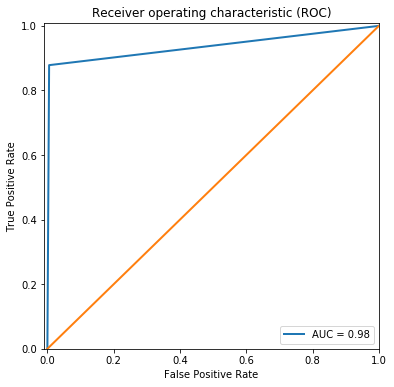

In [132]:
# Change Required
print('Train auc =', metrics.roc_auc_score(y_test, lr_predict))
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_predict)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

# Plot the roc curve 
plt.figure(figsize=(6,6))
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lr_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Conclusion 
- Decision Tree with ADASYN gives the best output
- Accuracy  : 91.12%
- Recall    : 93.24%
- Precision : 1.79%
- ROC AUC   : 92.18%